# Conceptos básicos

## 1. Carga de datos

##### Librerías

Las librerias en python se deben importar cada vez que se va a correr el jupyter, para ello es importante recordar que si durante el proceso de importación se genera un error se debe primero instalar la librería, normalmente para ello se utiliza el comando pip install.

Cada librería contiene una serie de funciones que permiten trabajar los sets de datos según las necesidades particulares. Las principales librerías que normalmente se usan son:
* Pandas: Librería utilizada para el manejo de bases de datos.
* Numpy: Librería utilizada para temas estadísticos y manejo de operaciones matemáticas.
* Os: Operating System, permite ignorar y corregir aquellos posibles errores que pueda tener al referenciar la ruta origen de los archivos de forma local.
* Matplotlib: Librería utilizada para realizar distintos tipos de gráficos.
* Seaborn: Librería utilizada para gráficos de alta calidad.

##### Extracción de información

Normalmente tenemos fuentes de datos diferentes, por ello a veces será necesario importar algunos paquetes para realizar la lectura de este tipo de archivos:
* csv: Paquete para manejo de más características de los archivos tipo csv
* urllib3: Paquete para navegar y acceder información desde la web

In [1]:
# Importaré las librerias que utilizaré a lo largo del curso
import pandas as pd
import numpy as np
import os

# Importación de paquetes
import csv
import urllib3
import matplotlib.pyplot as plt

# Genero la configuración para que jupyter me permita autocompletar con el tab
%config IPCompleter.greedy=True

En el momento que deseamos realizar el cargue de la base de datos, es importante tener en cuenta la extensión del archivo que vamos a cargar, de igual forma es importante tener presente que usando el prefijo pd. le estamos indicando que vamos a trabajar con un dataframe ("similar a una base de datos en excel") que se encuentra en la librería de pandas.

#### Componentes de la función read_csv
La función tiene 30 parámetros para configurar, los más importantes son:
* filepath: Corresponde a la dirección para la base de datos.
* sep: Separador que se da entre comillas. Puede ser ";" o "/" o "|"
* dtype: Algunas columnas pueden ser formateadas para aplicar ciertos conteos, el dato por defecto es none. Si quiero modificarlo, coloco la columna y el tipo de dato así {"nombre_columna": tipo de dato"}
* header: Si contiene o no los nombres de cabecera.
* names: Nombre de las columnas, se genera una lista o arrays para generar el nombre.
* skiprows: Se puede saltar un determinado grupo de filas durante la lectura de la base de datos. El valor por defecto es none.
* index_col: Genera una secuencia para trabajar con los datos.
* skip_blank_linea: Son valores que normalmente están por False, al ponerlo en True deja de marcar como Nan y pasa a en blanco.

#### Alternativas para el cargue de archivos csv
La forma de cargue se puede hacer de distintas formas:
* Función read_csv con la dirección de la ubicación del archivo.
* Generar una variable que contenga el mainpath (dirección principal) y el filename (nombre del archivo), esto es especialmente útil cuando tengo muchos datasets con diferentes nombres ubicados en la misma carpeta.

### Dataset Titanic:
El titanic tan conocido en la película, también es un set de datos muy útil y muy usado para implementar distintos modelos de machine learning, empezaremos cargando este set de datos y realizaremos los primeros pasos de análisis.

In [3]:
# Cargue de la base de datos titanic.

# Tener presente que el .. en la ruta me ayuda a subir una carpeta de donde estoy ubicado actualmente
Titanic = pd.read_csv("../python-ml-course-master/datasets/titanic/titanic3.csv")
Titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
# Revisión del tamaño del set de datos en filas y columnas
Titanic.shape

(1309, 14)

#### Revisión de la base de datos
La base de datos tiene registros de 1.309 pasajeros con 14 tipos de información diferente. Las columnas están distribuidas de la siguiente forma:
* pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)
* survival: Survive (0 = No; 1 = Yes)
* name: Passenger name
* sex: Sex
* age: Edad
* sibsp: Number of Siblings/Spouses Aboard
* parch: Number of Parents/Children Aboard
* ticket: Ticket Number
* fare: Passenger Fare
* cabin:  Cabin
* embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat: Lifeboat
* body: Body Identification Number
* home.dest: Home/Destination
Conocer la base de datos en cuanto a las columnas, el tipo de dato y que muestra en cada una es muy importante, este será el punto de partida antes de empezar el análisis y la comprensión.

##### *Nota: Adicional a lo anterior es importante tener claro el caso de negocio que se desea resolver, ya que todos los esfuerzos deben ir enfocados a resolver este problema*.

#### Remplazo del nombre de las columnas.
En algunas ocasiones puedo tener dos tipos de archivos (uno con los encabezados y otro con la información de la base de datos) o desear cambiar el nombre de las columnas:

In [5]:
# Cargue de archivos ejemplo para remplazar los nombres de las columnas
Data = pd.read_csv("../python-ml-course-master/datasets\customer-churn-model/Customer Churn Model.txt")
Column_Names = pd.read_csv("../python-ml-course-master/datasets\customer-churn-model/Customer Churn Columns.csv")
Column_Names_list = Column_Names["Column_Names"].tolist()

# Para revisar el nombre de las columnas del data set:
print("--- Nombre de las columnas iniciales ---")
print(Data.columns.values)


#Remplazar el Data con los encabezados
Data = pd.read_csv("../python-ml-course-master/datasets\customer-churn-model/Customer Churn Model.txt", 
                  header= None, names = Column_Names_list)
print("--- Nombre de las columnas modificadas por la lista ---")
print(Data.columns.values)

--- Nombre de las columnas iniciales ---
['State' 'Account Length' 'Area Code' 'Phone' "Int'l Plan" 'VMail Plan'
 'VMail Message' 'Day Mins' 'Day Calls' 'Day Charge' 'Eve Mins'
 'Eve Calls' 'Eve Charge' 'Night Mins' 'Night Calls' 'Night Charge'
 'Intl Mins' 'Intl Calls' 'Intl Charge' 'CustServ Calls' 'Churn?']
--- Nombre de las columnas modificadas por la lista ---
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U']


### Carga de datos a través de la función OPEN.
En algunas ocasiones se pueden tener set de datos muy grandes, que al intentar cargarlos a través de pandas puede dejar sin memoria la máquina, para ello existe una función que una vez va leyendo los datos lo va borrando de la memoria optimizando y facilitando así el interactuar con gran cantidad de datos.

#### Ventajas
* Uso de grandes datasets
* Reducción del dataset para el manejo necesario
* Distribución del dataset en distintos ordenadores para el procesamiento

#### Recomendaciones
Una vez determino la ubicación del set de datos tengo tres opciones:
* r: read / lectura
* w: write / escritura --> Es mejor abrir el fichero en modo "a" (append) así se evitará que se pueda perder la información al sobre-escribirse.
* rw: read and write / lectura y escritura

Posterior se debe proceder al llamado de columnas a trabajar y para ello se determinan ciertos parámetros:
* readline(): Me permite leer una sola línea
* strip(): Me permite dividir los espacios en blanco al inicio y final de la linea.
* split(): Me permite dividir por un delimitador la línea de texto.

In [6]:
# Lectura del set de datos a través de open
Data = open("../python-ml-course-master/datasets\customer-churn-model/Customer Churn Model.txt","r")

# Ahora debo extraer las columnas del dataset que deseo.
Cols = Data.readline().strip().split(",")

#Determinar el número de columnas que tiene el data set.
n_Cols = len(Cols)

# Determinar el número de filas a través de un diccionario.
counter = 0
main_dict = {}
for col in Cols:
    main_dict[col] = []

    #Realizar el llenado del diccionario vacío y contar las filas.
for line in Data:
    values = line.strip().split(",")
    for i in range(len(Cols)):
        main_dict[Cols[i]].append(values[i])
    counter +=1
    
print ("Respuesta: El data set tiene %d filas y %d columnas" % (counter,n_Cols))
Data = pd.DataFrame(main_dict)
Data.head()

Respuesta: El data set tiene 3333 filas y 21 columnas


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.100000,110,45.070000,...,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1,False.
1,OH,107,415,371-7191,no,yes,26,161.600000,123,27.470000,...,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1,False.
2,NJ,137,415,358-1921,no,no,0,243.400000,114,41.380000,...,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0,False.
3,OH,84,408,375-9999,yes,no,0,299.400000,71,50.900000,...,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,False.
4,OK,75,415,330-6626,yes,no,0,166.700000,113,28.340000,...,122,12.610000,186.900000,121,8.410000,10.100000,3,2.730000,3,False.


### Lectura de archivos desde la web
Tener en cuenta que para ello también existen paquetes como urllib3 para traer información desde allí.

In [7]:
Medals_URL = "http://winterolympicsmedals.com/medals.csv"
Medals_Data = pd.read_csv(Medals_URL)
Medals_Data.head()

,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold


### Lectura de archivos xls y xlsx
Los archivos en excel en cualquiera de sus dos extensiones pueden ser cargados lo único que si debe tenerse como recomendación o precedente es que debe seleccionarse la hoja en la que se encuentra la información.

In [8]:
Titanic_xls = pd.read_excel("../python-ml-course-master/datasets/titanic/titanic3.xls",filename = "titanic3")
Titanic_xls.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Receta de cocina 1: Descarga de datos URL

## 2. Análisis Preliminar de los Datos
Son las siguientes tareas básicas que se deben realizar con base en las actividades necesarias para entender los datos, estadísticos básicos, faltantes de información, resumenes y visualizaciones.

#### Dimensiones y estructuras
* Dimensión: Número de columnas y de filas que tiene un dataset
* Estructuras: Revisión y comprensión del set de datos para analizar

Los análisis exploratorios de los datos nos permitirán de forma rápida encontrar los NaN o None que son básicamente aquellos que no tienen datos o se encuentran vacíos. Esto será de gran ayuda para cuando revisemos los estadísticos básicos y para tratamientos posteriores. 

In [9]:
# Importación de los datos.
Titanic = pd.read_csv("../python-ml-course-master/datasets/titanic/titanic3.csv")
## Revisar que la base de datos ha sido cargada y permite entender mejor los datos que tiene.
Titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
#Revisión de los últimos datos en el data frame
Titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [11]:
# Revisión de la dimensión del dataset (filas, columnas)
Titanic.shape

(1309, 14)

In [12]:
# Revisión de los nombres de las columnas.
Titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

#### Estadísticos básicos
Resumen estadístico básicos del data set para comprender como se distribuyen las variables
* Count: Cantidad de datos que se tienen omitiendo los vacíos.
* Mean: Media
* std: Desviación estándar
* Min: Valor mínimo
* Max: Valor máximo.

In [13]:
# Determinar los estadísticos básicos (count, mean, std, min, quantiles, max)
Titanic.describe().round(2)

,pclass,survived,age,sibsp,parch,fare,body
count,1309.00,1309.00,1046.00,1309.00,1309.00,1308.00,121.00
mean,2.29,0.38,29.88,0.50,0.39,33.30,160.81
std,0.84,0.49,14.41,1.04,0.87,51.76,97.70
min,1.00,0.00,0.17,0.00,0.00,0.00,1.00
25%,2.00,0.00,21.00,0.00,0.00,7.90,72.00
50%,3.00,0.00,28.00,0.00,0.00,14.45,155.00
75%,3.00,1.00,39.00,1.00,0.00,31.28,256.00
max,3.00,1.00,80.00,8.00,9.00,512.33,328.00


Lo valioso es el análisis que se puede obtener.
* No todos los registros tienen la edad, y el conteo de body representa solo 9% del total de data set.
* La clasificación de los pasajeros (pclass) denota que la mayor proporción de personas se encontraban en la clase 3.
* Se han encontrado edades de 0,17 lo cual correspondería a un bebé.
* La mitad de la población que viajaba era menor a 29 años.
* La columna parch tiene al menos el 75% de la base con 0.

In [14]:
# Revisión de los data types para identificar los tipos de datos de las variables
Titanic.dtypes

#Esta información es importante para determinar el tipo de operaciones que se pueden o no realizar.

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

##### Datos nulos o vacíos. (Missing values)
Gestionar estos datos faltantes es muy importante, ya que es lo que nos permitirá estar tranquilos respecto a los resultados que hemos obtenido y que no se están viendo afectados por esos datos extraños, estos datos faltantes pueden ser producto de:
* Extracción de los datos: Se pueden generar producto de la incompatibilidad entre nuestra fuente de datos y la forma de extracción realizada.
* Recolección de los datos: No se introducen los datos dentro de los data sets ya que los datos no se consiguen del usuario o no los desea brindar. (Tiempo a partir del cual empiezo a recoger los datos).

##### Tratamiento
Existen distintos tipos de tratamientos para estos conjuntos de datos:
* Drástico: Si me falta un dato decido borrar toda la fila o toda la columna, según el nivel de datos faltantes.
    * Puede que me falte solo 1% de la columna, por lo que podría borrar la fila que no contiene ese dato.
    * Puede que me falte 99% de la columna, por lo que la mejor opción es retirarla ya que no es posible realizar algún tipo de hallazgo.
* No tan drástico: Imputación o cómputo de los valores faltantes, es importante recordar que para ello el contexto del negocio es sumamente importante. Algunas de las opciones son:
    * Remplazar los NaN por 0
    * Remplazar los NaN por una palabra
    * Remplazar por fila lo que necesito y teniendo en cuenta el contexto.
    * Remplazar los faltantes por la mediana o la media de los datos
    * Remplazar con el backfill o forwardfill.

###### Nota: 
* Cada vez que se desea realizar un filtro sobre una columna, se llama el data frame y el nombre de la columna se indica entre corchetes cuadrados.
* Recordar que los valores TRUE = 1 y los FALSE = 0 por tanto se pueden sumar estas columnas.
* Si se realiza la suma de campos con datos NaN el resultado será NaN.

In [15]:
# Comprobar sobre el conjunto de datos si en una columna especifica tenemos datos vacíos.
null = pd.isnull(Titanic["body"]).sum()
not_null = pd.notnull(Titanic["body"]).sum()
print("El número de datos vacíos para body es %d mientras el número datos con información es %d"% (null, not_null))

El número de datos vacíos para body es 1188 mientras el número datos con información es 121


In [16]:
# Tratamiento nivel: Drástico

#Para borrar los datos dentro de las filas uso dropna selecciono la axis=0, el how es el como las borrará
    #El how = all --> Solo la fila con todos los datos NaN será borrada
    #El how = any --> Si alguna de las filas tiene NaN será borrada
    
# Por el momento dejaremos el all para que si alguna fila está totalmente vacía sea eliminada.
Titanic.dropna(axis=0, how = "all")
Titanic.head()

#Para borrar los datos dentro de las columnas dropna selecciono la axis=1, el how es el como las borrará
        #Titanic.dropna(axis=1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [17]:
# Tratamiento nivel: Imputación de los valores faltantes todos por el mismo valor

# Imputación por 0 en todo el data set
Imp_0_titanic = Titanic
Imp_0_titanic.fillna(0)

# Imputación por una palabra
Imp_word_titanic = Titanic
Imp_word_titanic.fillna("Desconocido").head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.338,B5,S,2,Desconocido,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,Desconocido,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,Desconocido,Desconocido,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,Desconocido,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,Desconocido,Desconocido,"Montreal, PQ / Chesterville, ON"


In [18]:
# Tratamiento nivel: Imputación de los valores faltantes según la columna
Imp_column_titanic = Titanic

#Remplazar la columna según el campo que mejor se ajusta
Imp_column_titanic["body"] = Imp_column_titanic["body"].fillna(0)
Imp_column_titanic["home.dest"] =Imp_column_titanic["home.dest"].fillna("Desconocido")
Imp_column_titanic.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,0.0,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,0.0,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,0.0,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,0.0,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [19]:
# Tratamiento nivel: Imputación de los valores por la media o la mediana
pd.isnull(Imp_column_titanic["age"]).sum()

# Rellenar con la media de los datos
Imp_column_titanic["age"].fillna(Imp_column_titanic["age"].mean()).round(0)


# Rellenar con el forwardfill --> lo lleno con el valor hacia adelante del NaN
Imp_column_titanic["age"].fillna(method = "ffill")

#Rellenar con el backward ---> Lo lleno con el valor hacia anterior que tenemos del NaN
Imp_column_titanic["age"].fillna(method = "backfill")

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
5       48.0000
6       63.0000
7       39.0000
8       53.0000
9       71.0000
10      47.0000
11      18.0000
12      24.0000
13      26.0000
14      80.0000
15      24.0000
16      24.0000
17      50.0000
18      32.0000
19      36.0000
20      37.0000
21      47.0000
22      26.0000
23      42.0000
24      29.0000
25      25.0000
26      25.0000
27      19.0000
28      35.0000
29      28.0000
         ...   
1279    14.0000
1280    22.0000
1281    22.0000
1282    32.5000
1283    32.5000
1284    32.5000
1285    32.5000
1286    38.0000
1287    51.0000
1288    18.0000
1289    21.0000
1290    47.0000
1291    28.5000
1292    28.5000
1293    28.5000
1294    28.5000
1295    21.0000
1296    27.0000
1297    36.0000
1298    36.0000
1299    27.0000
1300    15.0000
1301    45.5000
1302    14.5000
1303    14.5000
1304    14.5000
1305    26.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309,

##### Manejo de variables Dummy
Son variables separadas para las categorías, esto nos ayuda a generar variables causales que no es tan sencillo de ver o validar en el dataset.

*Normalmente este tipo de tratamiento se realiza en variables como el sexo que tiene dos categorías, ya que es importante tener presente que a mayor número de categorías así mismo se crearán columnas.

In [20]:
# Proceso de dummificación
    # El prefijo es el que me permite distinguir sobre que variable realice la dummy
dummy_sex = pd.get_dummies(Titanic["sex"], prefix= 'sex')
dummy_sex.head()

# Importante es unificar las variables dummies al dataset
    # Se debe tener presente que si quiero que el crecimiento se de en columnas el axis es 1
Titanic = pd.concat([Titanic, dummy_sex], axis = 1)
Titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0


In [21]:
# Creación de una función para generar dummies.
def createdummies(df, var_name):
    dummies = pd.get_dummies(df[var_name], prefix = var_name)
    df = df.drop(var_name, axis=1)
    df = pd.concat([df,dummies], axis = 1)
    return df.head()
# De esta forma lo único que debo hacer es ingresar el dataset y la varible categórica a volver dummy

## 3. Análisis gráfico de las variables
Las relaciones gráficas nos ayudan a identificar la distribución de nuestras variables, las posibles relaciones entre variables.

Para realizar los plot es importante tener en cuenta los siguientes aspectos:
* El matplotlib nos sirve para realizar estos gráficos

In [23]:
# Cargue del modelo de datos que vamos a trabajar para la visualización.
Churn_model = pd.read_csv("../python-ml-course-master/datasets\customer-churn-model/Customer Churn Model.txt")

# Esto se debe realizar para poder realizar los plot
% matplotlib inline

In [24]:
Churn_model.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


##### Scatter plot
Me pertmite rápidamente ver la relación entre dos variables que considero pueden tener algún tipo de relación, para ello puedo combinar el análisis exploratorio previo con este análisis.

La combinación de dos o más gráficos permite realizar intuición entre variables especialmente si comparten el mismo eje, ya que se podrá ver claramente como aunque dos tendencias puedan parecer iguales, el cambio de escala genera movimiento en la pendiente de la visualización.

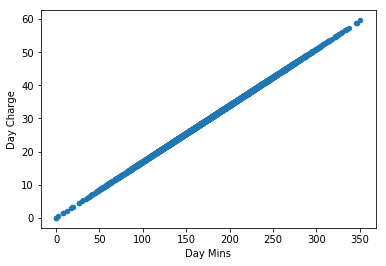

In [25]:
# Para este caso se reaiza un plot "evidente" que a mayor carga más tiempo puede usarse el dispositivo.
Churn_model.plot(kind = "scatter", x= "Day Mins", y = "Day Charge")

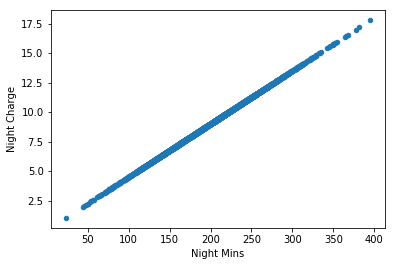

In [26]:
# Relación de las variables de las variables carga de noche y tiempo de uso noche.
Churn_model.plot(kind = "scatter", x = "Night Mins", y = "Night Charge")

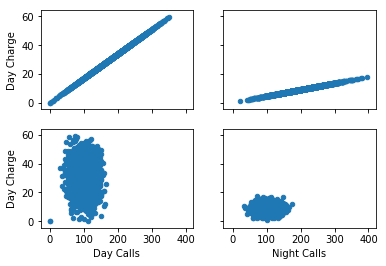

In [39]:
# Gráfico de relación entre variables usando matplotlib
Figure, Axs = plt.subplots(2,2, sharey= True, sharex = True)

# Genero el gráfico de la posición izquierda superior
Churn_model.plot(kind = "scatter", x = "Day Mins", y = "Day Charge", ax = Axs[0][0])

# Genero el gráfico de la posición derecha superior
Churn_model.plot(kind = "scatter", x = "Night Mins", y = "Night Charge", ax = Axs[0][1])

# Genero el gráfico de la posición izquierda inferior
Churn_model.plot(kind = "scatter", x = "Day Calls", y = "Day Charge", ax = Axs[1][0])

# Genero el gráfico de la posición derecha inferior
Churn_model.plot(kind = "scatter", x = "Night Calls", y = "Night Charge", ax = Axs[1][1])

##### Histograma de frecuencias
Permite entender la distribución de una variable a través de rangos o grupos, fácilmente evidenciar los puntos de concentración de los datos, el punto de partida y el punto final.

Normalmente para definir el número de veces en las que diviré el histograma, puedo utilizar:
* Forma arbitraria: Determino el parámetro en que quiero dividir.
* Regla sturges: 1 + (Log2 (M)) dónde M es el tamaño de la muestra, la cual optimiza la forma de ver el histograma.

Text(0.5,1,'Histograma de llamadas al día')

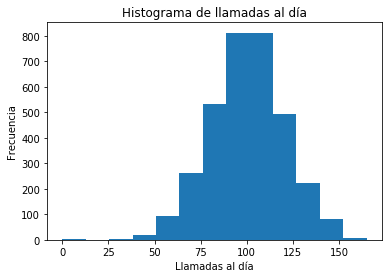

In [46]:
# Generar la regla de sturges
Sturges = int(np.ceil(1 + (np.log2(len(Churn_model)))))

# Generar el histograma de frecuencias
    # Tener en encuenta que bins será el número de partes en que se divide para mostrarnos el histograma
plt.hist(Churn_model["Day Calls"], bins = Sturges)

# Generar el nombre de los ejes
plt.xlabel("Llamadas al día")
plt.ylabel("Frecuencia")

# Generar el nombre del gráfico
plt.title("Histograma de llamadas al día")

#### Boxplot - Diagrama de cajas
Permite entender la distribución númerica de la columna que deseamos analizar

##### Interpretación
* El eje y me mostrará la distribución de los datos
* La caja indica dónde está la mayor concentración de datos
    * La parte inferior de la caja corresponde al 25% de los datos
    * La parte superior de la caja representa el 75% de los datos
    * La raya central hace referencia al percentil 50 o la mediana.
* La diferencia entre el tercer y el primer quartil (75% - 25%) me da el rango interquartil (IQR), define la altura de la caja.
    * El min se determina como el 25% - 1.5 * IQR
    * El max se determina como el 75% + 1.5 * IQR
* Todos aquellos datos que quedan por fuera de los rangos max y min se colocarán con puntos.

El IQR es 27 , mientras que el mínimo de la caja es 46 y el máximo de la caja es 154


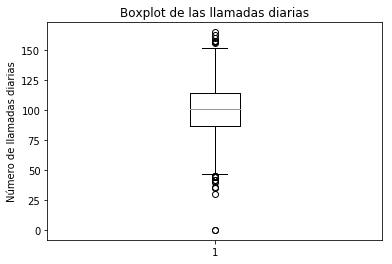

In [51]:
# Generar el boxplot
plt.boxplot(Churn_model["Day Calls"])
plt.ylabel("Número de llamadas diarias")
plt.title("Boxplot de las llamadas diarias")

# Calculo del IQR y Min y Max del boxplot
IQR = Churn_model["Day Calls"].quantile(0.75) - Churn_model["Day Calls"].quantile(0.25)
Min = Churn_model["Day Calls"].quantile(0.25) - 1.5 * IQR
Max = Churn_model["Day Calls"].quantile(0.75) + 1.5* IQR
print("El IQR es %d , mientras que el mínimo de la caja es %d y el máximo de la caja es %d"%(IQR, Min, Max))